In [1]:
import pandas as pd

# Read JSON file into DataFrame
df = pd.read_json('/allah/freqtrade/orange_project/json_files/trades.json')

# Select relevant columns
df_date = df.loc[:, ['open_date', 'close_date', 'profit_ratio', 'is_short']]

# Convert timestamp columns to datetime
df_date['open_date'] = pd.to_datetime(df_date['open_date'], unit='ms')
df_date['close_date'] = pd.to_datetime(df_date['close_date'], unit='ms')

# Format profit_ratio column
df_date['profit_ratio'] = (df_date['profit_ratio'] * 100).round(2).astype(str) + '%'


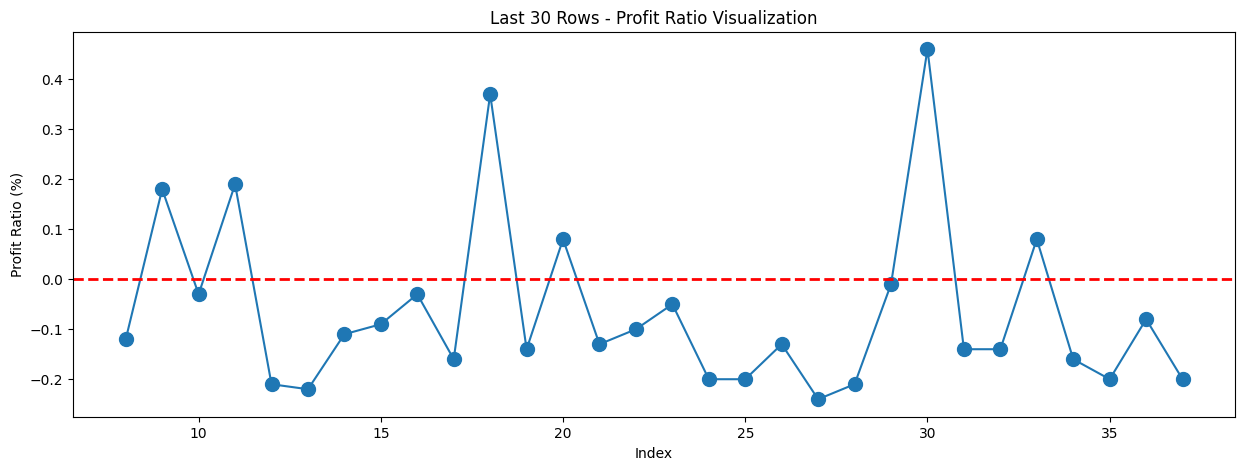

In [2]:
import matplotlib.pyplot as plt

def plot_profit_ratio(df, window=30):
    """
    Plot the 'profit_ratio' with markers and a red line at y=0.

    Parameters:
    - df: DataFrame with 'profit_ratio' column
    - window: Number of rows to display and plot (default: 30)
    """
    # Create a copy to avoid SettingWithCopyWarning
    tail_df = df.tail(window).copy()
    
    # Convert 'profit_ratio' to float
    tail_df['profit_ratio'] = tail_df['profit_ratio'].str.replace('%', '').astype(float)

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.plot(tail_df.index, tail_df['profit_ratio'], marker='o', markersize=10)

    # Add a red line at y=0
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

    # Customize labels and title
    plt.xlabel('Index')
    plt.ylabel('Profit Ratio (%)')
    plt.title('Last {} Rows - Profit Ratio Visualization'.format(window))
    
    # Show the plot
    plt.show()

# Call the function with your DataFrame
plot_profit_ratio(df_date, window=30)


In [4]:
df_date

,open_date,close_date,profit_ratio,is_short
0,2023-12-25 02:16:00,2023-12-25 02:43:00,0.17%,True
1,2023-12-25 02:52:00,2023-12-25 03:06:00,-0.14%,False
2,2023-12-25 03:07:00,2023-12-25 03:41:00,0.13%,False
3,2023-12-25 03:54:00,2023-12-25 04:34:00,0.06%,False
4,2023-12-25 04:47:00,2023-12-25 05:40:00,-0.01%,False
5,2023-12-25 05:41:00,2023-12-25 06:35:00,0.18%,False
6,2023-12-25 06:43:00,2023-12-25 07:33:00,0.05%,True
7,2023-12-25 07:41:00,2023-12-25 07:58:00,-0.1%,False
8,2023-12-25 08:12:00,2023-12-25 08:34:00,-0.12%,False
9,2023-12-25 08:41:00,2023-12-25 08:56:00,0.18%,True
